In [274]:
import numpy as np
import matplotlib.pyplot as plt

In [275]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gaussians(samples_params, bins=100):
    """
    samples_params: list of dicts, each with keys 'mean', 'std', 'size', 'color', 'label'
    """
    plt.figure(figsize=(10, 6))
    
    for params in samples_params:
        mean = params['mean']
        std_dev = params['std']
        size = params['size']
        color = params.get('color', 'skyblue')
        label = params.get('label', f"Gaussian (mean={mean}, std={std_dev})")
        
        # Generate samples
        data = np.random.normal(loc=mean, scale=std_dev, size=size)
        
        # Histogram
        plt.hist(data, bins=bins, density=True, alpha=0.6, color=color, edgecolor='black', label=f'{label} histogram')
        
        # Plot ideal Gaussian PDF
        x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
        pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
        plt.plot(x, pdf, color=color, linewidth=2, linestyle='--', label=f'{label} PDF')
    
    plt.title("Gaussian-Distributed Numbers")
    plt.xlabel("Value")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.legend()
    plt.show()


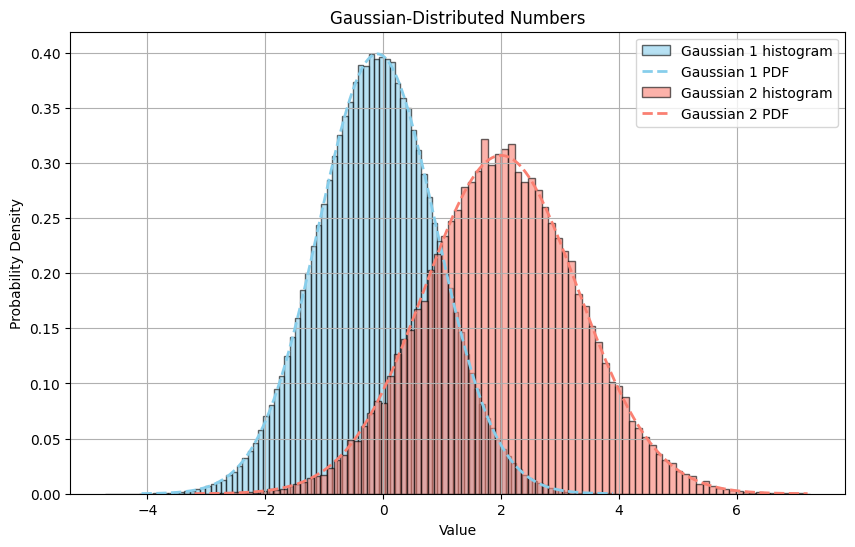

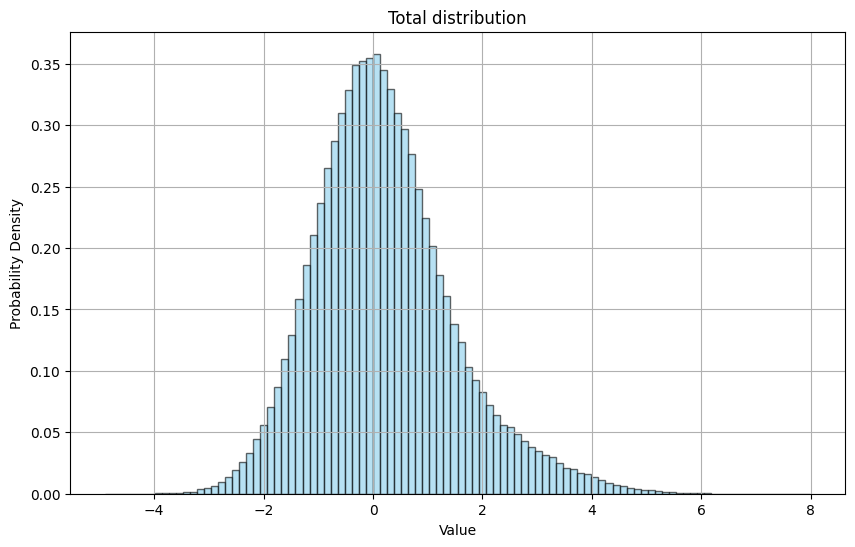

In [276]:
mean_1 = -0.1
std_dev_1 = 1.0
counts_1 = 300000
gaussian_numbers = np.random.normal(loc=mean_1, scale=std_dev_1, size=counts_1)

# Generate another set from a different Gaussian
mean_2 = 2
std_dev_2 = 1.3
counts_2 = 50000
other_gaussian_numbers = np.random.normal(loc=mean_2, scale=std_dev_2, size=counts_2)

# Append by concatenating the two arrays
sampled_numbers = np.concatenate([gaussian_numbers, other_gaussian_numbers])
# Example usage:
samples = [
    {'mean': mean_1, 'std': std_dev_1, 'size': counts_1, 'color': 'skyblue', 'label': 'Gaussian 1'},
    {'mean': mean_2, 'std': std_dev_2, 'size': counts_2, 'color': 'salmon', 'label': 'Gaussian 2'}
]

plot_gaussians(samples)
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(sampled_numbers, bins=100, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.title("Total distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()

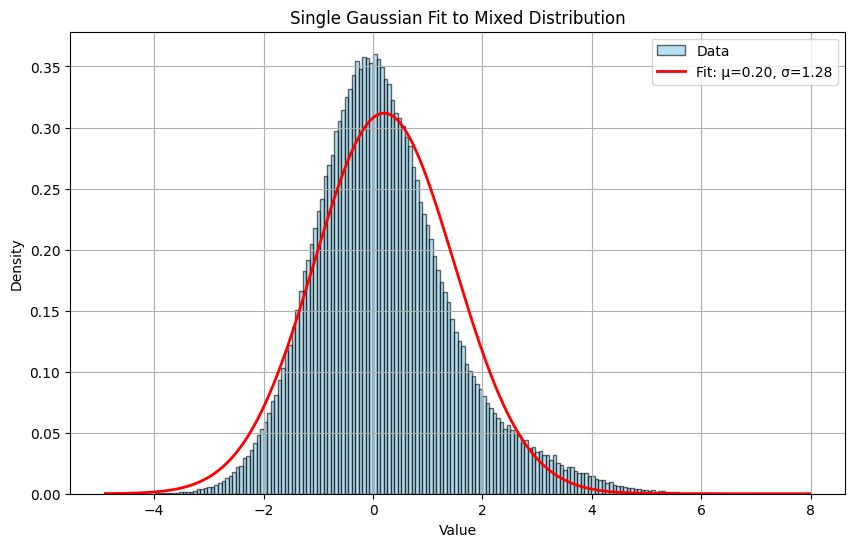

In [277]:
from scipy.stats import norm
mu, std = norm.fit(sampled_numbers)

# Plot histogram of the data
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(sampled_numbers, bins=200, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Data')

# Plot the fitted Gaussian
x = np.linspace(bins[0], bins[-1], 1000)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', linewidth=2, label=f'Fit: μ={mu:.2f}, σ={std:.2f}')

plt.title("Single Gaussian Fit to Mixed Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [278]:
import numpy as np

def bin_stats(data, bins):
    counts = np.histogram(data, bins=bins)[0]
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # For mean per bin, we use digitize and then compute means
    inds = np.digitize(data, bins) - 1  # indices of bins for each data point
    means = np.empty(len(bin_centers))
    means.fill(np.nan)  # default NaN for empty bins
    
    for i in range(len(bin_centers)):
        in_bin = data[inds == i]
        if len(in_bin) > 0:
            means[i] = in_bin.mean()
        else:
            means[i] = 0

    return counts, bin_centers, means

large_bins = np.arange(sampled_numbers.mean()-1.6, sampled_numbers.mean()+1.6, 1.0)
intermediate_bins = np.arange(sampled_numbers.mean()-1.6, sampled_numbers.mean()+1.6, 0.5)
small_bins = np.arange(sampled_numbers.mean()-1.6, sampled_numbers.mean()+1.6, 0.1)

# large_bins = np.arange(-2.6, 4.1, 1.5)
# intermediate_bins = np.arange(-2.5, 3.1, 0.5)
# small_bins = np.arange(-2.5, 3.01, 0.1)

print("Large bins:", large_bins)
print("Intermediate bins:", intermediate_bins)
print("Small bins:", small_bins)

large_bins_ry, large_bins_centers, large_bins_centers_means = bin_stats(sampled_numbers, large_bins)
intermediate_bins_ry, intermediate_bins_centers, intermediate_bins_centers_means = bin_stats(sampled_numbers, intermediate_bins)
small_bins_ry, small_bins_centers, small_bins_centers_means = bin_stats(sampled_numbers, small_bins)

print("Large bins counts:", large_bins_ry)
print("Large bins centers:", large_bins_centers)
print("Large bins centers means:", large_bins_centers_means)


Large bins: [-1.39782179 -0.39782179  0.60217821  1.60217821]
Intermediate bins: [-1.39782179 -0.89782179 -0.39782179  0.10217821  0.60217821  1.10217821
  1.60217821]
Small bins: [-1.39782179 -1.29782179 -1.19782179 -1.09782179 -0.99782179 -0.89782179
 -0.79782179 -0.69782179 -0.59782179 -0.49782179 -0.39782179 -0.29782179
 -0.19782179 -0.09782179  0.00217821  0.10217821  0.20217821  0.30217821
  0.40217821  0.50217821  0.60217821  0.70217821  0.80217821  0.90217821
  1.00217821  1.10217821  1.20217821  1.30217821  1.40217821  1.50217821
  1.60217821  1.70217821]
Large bins counts: [ 87049 118591  71004]
Large bins centers: [-0.89782179  0.10217821  1.10217821]
Large bins centers means: [-0.83360376  0.08867857  1.03039052]


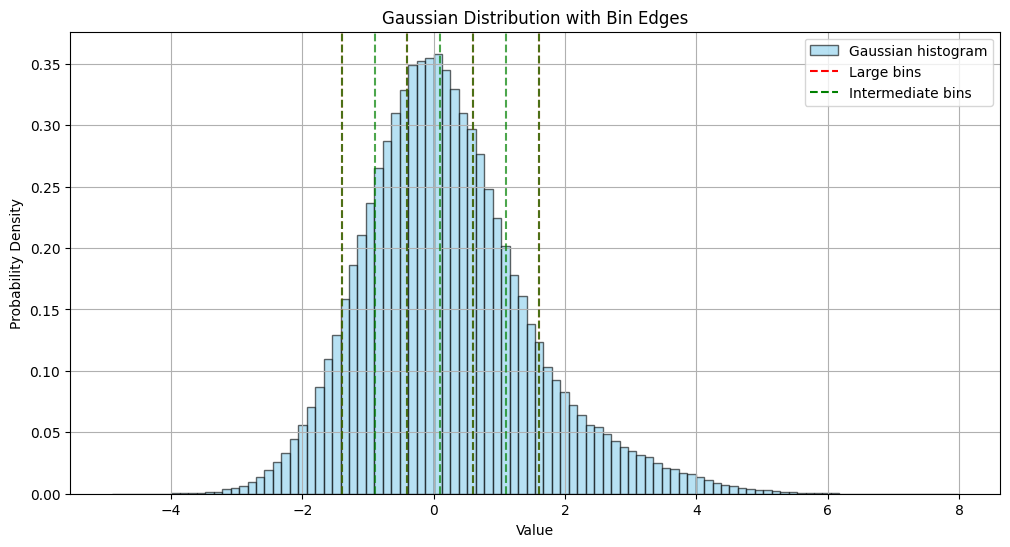

In [279]:
plt.figure(figsize=(12, 6))

# Plot histogram of Gaussian data
plt.hist(sampled_numbers, bins=100, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Gaussian histogram')

# Plot vertical lines for each bin set
for bins, color, label in zip([large_bins, intermediate_bins], ['red', 'green'], ['Large bins', 'Intermediate bins']):
# for bins, color, label in zip([large_bins, intermediate_bins, small_bins], ['red', 'green', 'purple'], ['Large bins', 'Intermediate bins', 'Small bins']):
    for b in bins:
        plt.axvline(b, color=color, linestyle='--', alpha=0.7)
    # Add a legend handle for lines (only one per bin set)
    plt.plot([], [], color=color, linestyle='--', label=label)

plt.title("Gaussian Distribution with Bin Edges")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

In [306]:
# retrieve windows for computing the average
def get_windows(data, window_size_min, increase_step, n_max_windows, tolerance_percent):
    sample_mean = sampled_numbers.mean()
    initial_window=[sample_mean - (window_size_min/2), sample_mean + (window_size_min/2)]
    window_left_edge = initial_window[0]
    window_right_edge = initial_window[1]
    windows = [initial_window]
    enlarge_left = 0
    enlarge_right = 0
    yield_initial_window = len(data[(data >= initial_window[0]) & (data < initial_window[1])]) 
    print("yield initial window:", yield_initial_window)
    tolerance = tolerance_percent * (yield_initial_window / 100)
    while len(windows) < n_max_windows and (enlarge_left < 300 and enlarge_right < 300):
        # evaluate yields in the left and right windows
        left_window = [window_left_edge - window_size_min - enlarge_left * increase_step, window_left_edge]
        right_window = [window_right_edge, window_right_edge + window_size_min + enlarge_right * increase_step]
        
        # if their difference is less than the tolerance, accept the windows
        yield_left_window = len(data[(data >= left_window[0]) & (data < left_window[1])])
        yield_right_window = len(data[(data >= right_window[0]) & (data < right_window[1])])
        if abs(yield_left_window - yield_right_window) < tolerance:
            windows.insert(0, left_window)
            windows.append(right_window)
            window_left_edge = left_window[0]
            window_right_edge = right_window[1]
            enlarge_left = 0
            enlarge_right = 0
        else:
            if yield_left_window < yield_right_window:
                enlarge_left += 1
            else:
                enlarge_right += 1

    return windows

def get_window_mean(window, data):
    avg_bin_centers = 0
    avg_bin_means = 0
    window_tot_yield = 0
    progr_avg_bin_centers = []
    progr_avg_bin_means = []
    for interval in window:
        yield_window = len(data[(data >= interval[0]) & (data < interval[1])])
        mean_window = data[(data >= interval[0]) & (data < interval[1])].mean()
        window_tot_yield += yield_window
        avg_bin_centers += yield_window * ((interval[0] + interval[1]) / 2)
        avg_bin_means += yield_window * mean_window
        progr_avg_bin_centers.append(avg_bin_centers)
        progr_avg_bin_means.append(avg_bin_means)
    
    avg_bin_centers /= window_tot_yield
    avg_bin_means /= window_tot_yield
    
    return avg_bin_centers, avg_bin_means, window_tot_yield, progr_avg_bin_centers, progr_avg_bin_means

In [320]:
sample_mean = sampled_numbers.mean()
print("Sample mean:", sample_mean)
# Try several window configurations
windows_1 = get_windows(sampled_numbers, window_size_min=0.2, increase_step=0.02, n_max_windows=10, tolerance_percent=5)
avg_centers_1, avg_means_1, total_yield_1, progr_avg_centers_1, progr_avg_means_1 = get_window_mean(windows_1, sampled_numbers)
print("[Range: ", windows_1[0][0], ", ", windows_1[-1][1], "], Average center for windows 1:", avg_centers_1, "Average mean for windows 1:", avg_means_1, "Total yield for windows 1:", total_yield_1)
windows_2 = get_windows(sampled_numbers, window_size_min=0.4, increase_step=0.02, n_max_windows=10, tolerance_percent=5)
avg_centers_2, avg_means_2, total_yield_2, progr_avg_centers_2, progr_avg_means_2 = get_window_mean(windows_2, sampled_numbers)
print("[Range: ", windows_2[0][0], ", ", windows_2[-1][1], "], Average center for windows 2:", avg_centers_2, "Average mean for windows 2:", avg_means_2, "Total yield for windows 2:", total_yield_2)
windows_3 = get_windows(sampled_numbers, window_size_min=0.2, increase_step=0.06, n_max_windows=10, tolerance_percent=5)
avg_centers_3, avg_means_3, total_yield_3, progr_avg_centers_3, progr_avg_means_3 = get_window_mean(windows_3, sampled_numbers)
print("[Range: ", windows_3[0][0], ", ", windows_3[-1][1], "], Average center for windows 3:", avg_centers_3, "Average mean for windows 3:", avg_means_3, "Total yield for windows 3:", total_yield_3)
windows_4 = get_windows(sampled_numbers, window_size_min=0.4, increase_step=0.06, n_max_windows=10, tolerance_percent=5)
avg_centers_4, avg_means_4, total_yield_4, progr_avg_centers_4, progr_avg_means_4 = get_window_mean(windows_4, sampled_numbers)
print("[Range: ", windows_4[0][0], ", ", windows_4[-1][1], "], Average center for windows 4:", avg_centers_4, "Average mean for windows 4:", avg_means_4, "Total yield for windows 4:", total_yield_4)
print(f"\n\nlen(windows_1): {len(windows_1)}, len(windows_2): {len(windows_2)}, len(windows_3): {len(windows_3)}, len(windows_4): {len(windows_4)}")

Sample mean: 0.20217820526740604
yield initial window: 24029
[Range:  -0.8978217947325939 ,  1.7621782052674058 ], Average center for windows 1: 0.24898099989758546 Average mean for windows 1: 0.24679012440115988 Total yield for windows 1: 247904
yield initial window: 47942
[Range:  -1.1978217947325942 ,  2.562178205267406 ], Average center for windows 2: 0.2871499760821373 Average mean for windows 2: 0.27395946472325866 Total yield for windows 2: 291188
yield initial window: 24029
[Range:  -1.197821794732594 ,  3.102178205267406 ], Average center for windows 3: 0.34731536571167204 Average mean for windows 3: 0.3395917075971991 Total yield for windows 3: 298920
yield initial window: 47942
[Range:  -1.1978217947325942 ,  2.862178205267406 ], Average center for windows 4: 0.3302606780310512 Average mean for windows 4: 0.31290895369549143 Total yield for windows 4: 295928


len(windows_1): 11, len(windows_2): 7, len(windows_3): 11, len(windows_4): 7


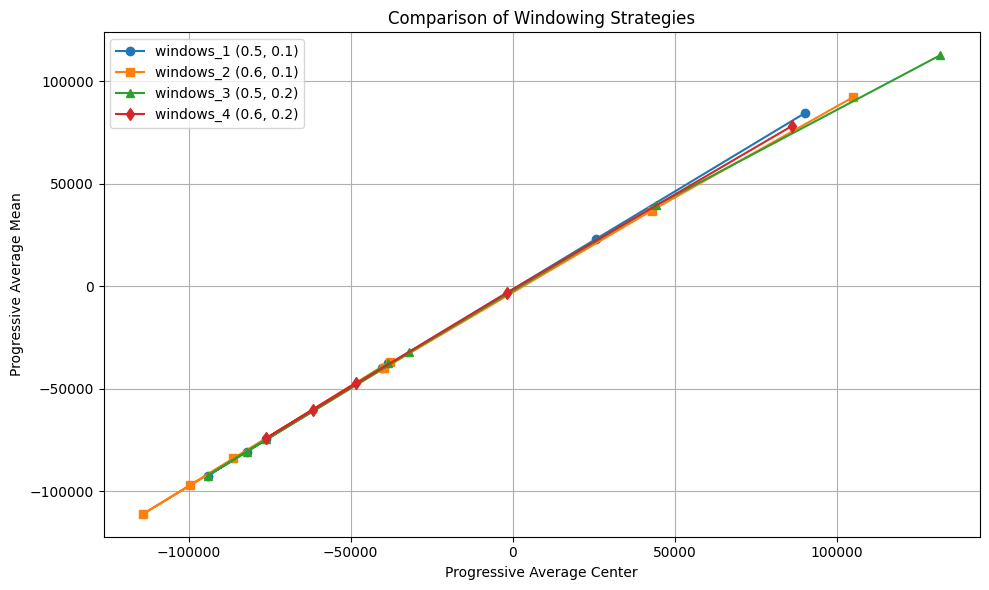

In [311]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot each window configuration
plt.plot(progr_avg_centers_1, progr_avg_means_1, marker='o', label='windows_1 (0.5, 0.1)')
plt.plot(progr_avg_centers_2, progr_avg_means_2, marker='s', label='windows_2 (0.6, 0.1)')
plt.plot(progr_avg_centers_3, progr_avg_means_3, marker='^', label='windows_3 (0.5, 0.2)')
plt.plot(progr_avg_centers_4, progr_avg_means_4, marker='d', label='windows_4 (0.6, 0.2)')

# Labels and legend
plt.xlabel("Progressive Average Center")
plt.ylabel("Progressive Average Mean")
plt.title("Comparison of Windowing Strategies")
plt.legend()
plt.grid(True)
# plt.yscale('log')
plt.tight_layout()
plt.show()


In [ ]:
# # bias-safe mean
# window_size_min = 0.1
# increase_step = window_size_min / 10

# # define the first window
# sample_mean = sampled_numbers.mean()
# initial_window = [sample_mean - (window_size_min / 2), sample_mean + (window_size_min / 2)]
# yield_initial_window = len(sampled_numbers[(sampled_numbers >= initial_window[0]) & (sampled_numbers < initial_window[1])]) 
# print("yield initial window:", yield_initial_window)
# tolerance = 10 * (yield_initial_window / 100)
# print("tolerance:", tolerance)
# windows = [initial_window]

# # find the windows at the left and at the right of the central one
# window_left_edge = initial_window[0]
# window_right_edge = initial_window[1]

# n_max_windows = 11

# enlarge_left = 0
# enlarge_right = 0
# while len(windows) < n_max_windows and (enlarge_left < 300 and enlarge_right < 300):
#     # evaluate yields in the left and right windows
#     left_window = [window_left_edge - window_size_min - enlarge_left * increase_step, window_left_edge]
#     right_window = [window_right_edge, window_right_edge + window_size_min + enlarge_right * increase_step]
    
#     # if their difference is less than the tolerance, accept the windows
#     yield_left_window = len(sampled_numbers[(sampled_numbers >= left_window[0]) & (sampled_numbers < left_window[1])])
#     yield_right_window = len(sampled_numbers[(sampled_numbers >= right_window[0]) & (sampled_numbers < right_window[1])])
#     if abs(yield_left_window - yield_right_window) < tolerance:
#         windows.insert(0, left_window)
#         windows.append(right_window)
#         window_left_edge = left_window[0]
#         window_right_edge = right_window[1]
#         enlarge_left = 0
#         enlarge_right = 0
#     else:
#         if yield_left_window < yield_right_window:
#             enlarge_left += 1
#         else:
#             enlarge_right += 1
#     # print("enlarge_left:", enlarge_left, "enlarge_right:", enlarge_right)

# # find index of the central window


# print("Windows found:", windows)
# # Calculate the yields and means for each window
# window_yields = []
# window_means = []
# window_centers = []
# for window in windows:
#     yield_window = len(sampled_numbers[(sampled_numbers >= window[0]) & (sampled_numbers < window[1])])
#     mean_window = sampled_numbers[(sampled_numbers >= window[0]) & (sampled_numbers < window[1])].mean()
#     window_yields.append(yield_window)
#     window_means.append(mean_window)
#     window_centers.append((window[0] + window[1]) / 2)
# print("Window yields:", window_yields)
# print("Window means:", window_means)
# print("Window centers:", window_centers)
# print("Difference between means:", np.array(window_means) - np.array(window_centers))
# avg_centers = np.sum(np.array(window_centers) * np.array(window_yields)) / np.sum(np.array(window_yields))
# avg_center_means = np.sum(np.array(window_means) * np.array(window_yields)) / np.sum(np.array(window_yields))
# print("Average center:", avg_centers)
# print("Average center means:", avg_center_means)
# print("Sample mean:", sample_mean)



yield initial window: 12012
tolerance: 1201.2
Windows found: [[-0.347821794732594, -0.24782179473259397], [-0.24782179473259397, -0.14782179473259396], [-0.14782179473259396, -0.04782179473259396], [-0.04782179473259396, 0.05217820526740605], [0.05217820526740605, 0.15217820526740605], [0.15217820526740605, 0.25217820526740603], [0.25217820526740603, 0.35217820526740606], [0.35217820526740606, 0.46217820526740605], [0.46217820526740605, 0.572178205267406], [0.572178205267406, 0.682178205267406], [0.682178205267406, 0.802178205267406]]
Window yields: [12286, 12253, 12582, 12414, 12497, 12012, 11620, 12122, 11648, 11165, 11320]
Window means: [-0.2973080569817086, -0.1976757525769071, -0.0980943723214119, 0.0025694447920949245, 0.10193951708234754, 0.20202084130914996, 0.3020158937200932, 0.40708177383800115, 0.516622610943655, 0.6262586681547527, 0.7407648517456221]
Window centers: [-0.29782179473259396, -0.19782179473259398, -0.09782179473259396, 0.0021782052674060443, 0.102178205267406

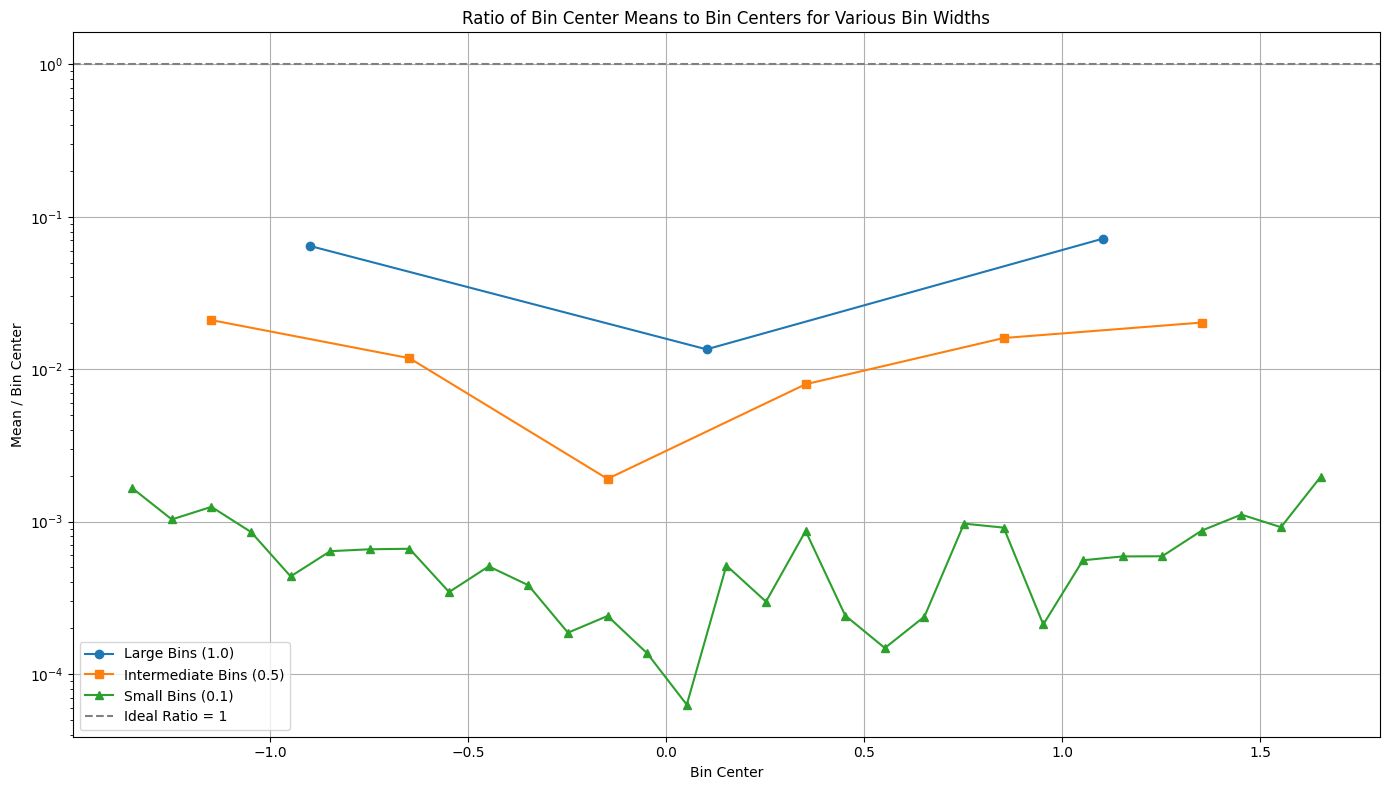

In [281]:
# Function to compute ratio safely
def diff_bin_center_mean(centers, means):
    centers = np.array(centers)
    means = np.array(means)
    return centers, (abs(means - centers))

# Compute ratios
large_x, large_y = diff_bin_center_mean(large_bins_centers, large_bins_centers_means)
intermediate_x, intermediate_y = diff_bin_center_mean(intermediate_bins_centers, intermediate_bins_centers_means)
small_x, small_y = diff_bin_center_mean(small_bins_centers, small_bins_centers_means)

# Plot
plt.figure(figsize=(14, 8))
plt.plot(large_x, large_y, label="Large Bins (1.0)", marker='o', linestyle='-')
plt.plot(intermediate_x, intermediate_y, label="Intermediate Bins (0.5)", marker='s', linestyle='-')
plt.plot(small_x, small_y, label="Small Bins (0.1)", marker='^', linestyle='-')

plt.axhline(1, color='gray', linestyle='--', linewidth=1.5, label="Ideal Ratio = 1")

plt.title("Ratio of Bin Center Means to Bin Centers for Various Bin Widths")
plt.xlabel("Bin Center")
plt.ylabel("Mean / Bin Center")
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.tight_layout()
plt.show()


In [282]:
large_avg_centers = np.sum(large_bins_centers * large_bins_ry) / np.sum(large_bins_ry)
mean = 0.0
for bin_center, ry in zip(large_bins_centers, large_bins_ry):
    mean += bin_center * ry
mean /= np.sum(large_bins_ry)
print("Mean of large bins:", mean)

intermediate_avg_centers = np.sum(intermediate_bins_centers * intermediate_bins_ry) / np.sum(intermediate_bins_ry)
small_avg_centers = np.sum(small_bins_centers * small_bins_ry) / np.sum(small_bins_ry)

large_avg_centers_means = np.sum(large_bins_centers_means * large_bins_ry) / np.sum(large_bins_ry)
intermediate_avg_centers_means = np.sum(intermediate_bins_centers_means * intermediate_bins_ry) / np.sum(intermediate_bins_ry)
small_avg_centers_means = np.sum(small_bins_centers_means * small_bins_ry) / np.sum(small_bins_ry)

print("Large bins average centers:", large_avg_centers)
print("Large bins average centers means:", large_avg_centers_means)
print("Intermediate bins average centers:", intermediate_avg_centers)
print("Intermediate bins average centers means:", intermediate_avg_centers_means)
print("Small bins average centers:", small_avg_centers)
print("Small bins average centers means:", small_avg_centers_means)
print("True mean of Gaussian distribution:", gaussian_numbers.mean())

Mean of large bins: 0.04417947766080695
Large bins average centers: 0.04417947766080695
Large bins average centers means: 0.0401742118233296
Intermediate bins average centers: 0.041038256452322404
Intermediate bins average centers means: 0.04017421182332957
Small bins average centers: 0.06395768066673423
Small bins average centers means: 0.06391898722221177
True mean of Gaussian distribution: -0.09850190005598566


Bin center: -0.8978217947325939, ry: 87049
Partial mean before: 0
Partial mean after: -0.282509251636318
Bin center: 0.10217820526740606, ry: 118591
Partial mean before: -0.282509251636318
Partial mean after: -0.23870777558454406
Bin center: 1.102178205267406, ry: 71004
Partial mean before: -0.23870777558454406
Partial mean after: 0.044179477660807015
Partial means for super super small bins: [-0.282509251636318, -0.23870777558454406, 0.044179477660807015]


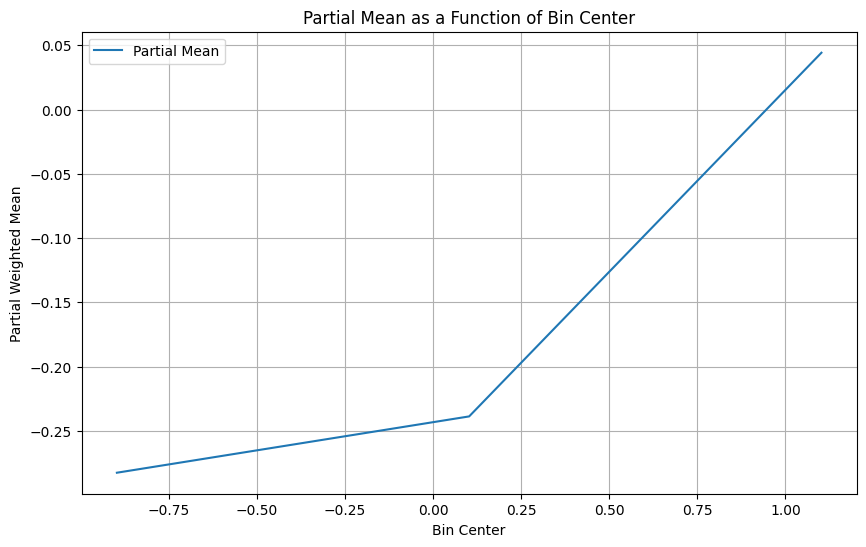

In [283]:
partial_means_large = [0]  # Start with zero

total_ry = np.sum(large_bins_ry)

for bin_center, ry in zip(large_bins_centers, large_bins_ry):
    print(f"Bin center: {bin_center}, ry: {ry}")
    print(f"Partial mean before: {partial_means_large[-1]}")
    partial_means_large.append(partial_means_large[-1] + ( (bin_center * ry) / total_ry))
    print(f"Partial mean after: {partial_means_large[-1]}")

# Remove the initial zero if you want
partial_means_large = partial_means_large[1:]

print("Partial means for super super small bins:", partial_means_large)
bin_centers = np.array(large_bins_centers)
partial_means = np.array(partial_means_large)

plt.figure(figsize=(10,6))
plt.plot(bin_centers, partial_means, label='Partial Mean')
plt.xlabel('Bin Center')
plt.ylabel('Partial Weighted Mean')
plt.title('Partial Mean as a Function of Bin Center')
plt.grid(True)
plt.legend()
plt.show()

Large Avg Center: 0.0442
Intermediate Avg Center: 0.0410
Small Avg Center: 0.0640
Equal yield Center: -0.2437
Large Avg Center Means: 0.0402
Intermediate Avg Center Means: 0.0402
Small Avg Center Means: 0.0639
Equal yield Center Means: nan
Data Mean: 0.2022


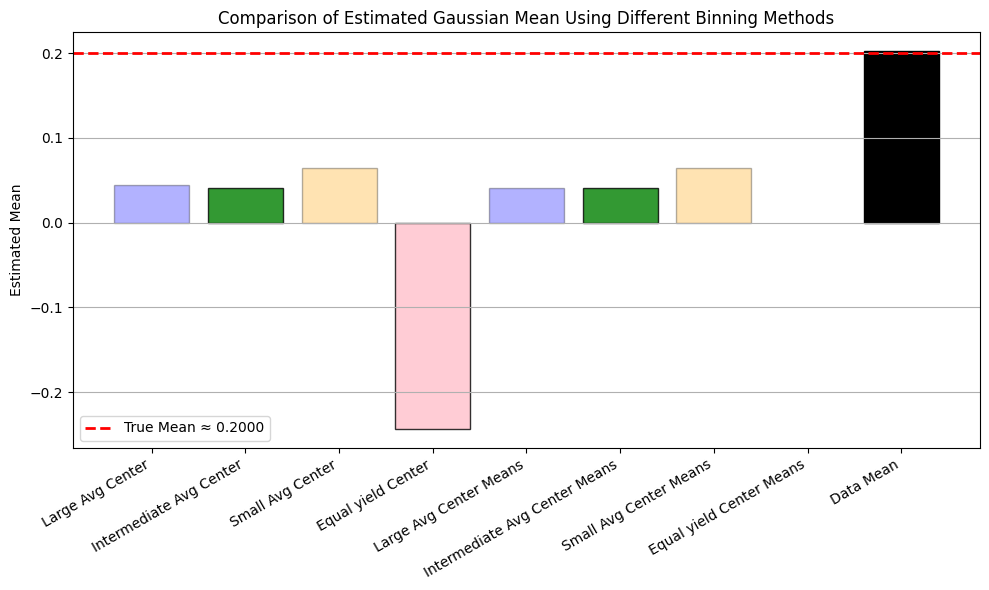

In [284]:
import matplotlib.pyplot as plt

# Prepare values and labels
values = [
    large_avg_centers,
    intermediate_avg_centers,
    small_avg_centers,
    avg_centers,
    large_avg_centers_means,
    intermediate_avg_centers_means,
    small_avg_centers_means,
    avg_center_means,
    sampled_numbers.mean()  # true mean
]

labels = [
    "Large Avg Center",
    "Intermediate Avg Center",
    "Small Avg Center",
    "Equal yield Center",
    "Large Avg Center Means",
    "Intermediate Avg Center Means",
    "Small Avg Center Means",
    "Equal yield Center Means",
    "Data Mean"
]

for value, label in zip(values, labels):
    print(f"{label}: {value:.4f}")

# Plot
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'pink', 'blue', 'green', 'orange', 'pink', 'black']
alphas = [0.3, 0.8, 0.3, 0.8, 0.3, 0.8, 0.3, 0.8, 1.0]

# Create bars with colors
bars = plt.bar(labels, values, color=colors, edgecolor='black')

# Set individual alpha for each bar
for bar, alpha in zip(bars, alphas):
    bar.set_alpha(alpha)


plt.axhline(y=( (mean_1 * counts_1 + mean_2 * counts_2) / (counts_1 + counts_2) ), color='red', linestyle='--', linewidth=2, label=f"True Mean ≈ {( (mean_1 * counts_1 + mean_2 * counts_2) / (counts_1 + counts_2) ):.4f}")

plt.title("Comparison of Estimated Gaussian Mean Using Different Binning Methods")
plt.ylabel("Estimated Mean")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.grid(axis='y')
# plt.yscale('log')
plt.legend()
plt.show()
